<a href="https://colab.research.google.com/github/GoranTopic/Adjetive-Animal-Match/blob/master/Copy_of_food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import drive to make sure it is mounted
from google.colab import drive
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('seaborn')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Lets mount the drive an read the data set
sales_df = pd.read_csv("/content/drive/MyDrive/CodingDojo/Data/sales_predictions.csv")
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Check for nun values and zeros**

## **My Approach:**
I want to be able to replace the missing value in this data set by replaing the to the values which they show the strongest correlation to. My reasoning is that this will give me the most accurate replacement of the missing values. We might even be able to create a function which take the value of a correlated value and return the aproximate missing value.  

> First order of bussines is to take all the missing value from our data set. We can fo this by droping all the row wich contain missing values. 

In [ ]:
# lets fin the number of colmns which have the missing values
sales_df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

> We can see that the Columns which have missin values is just 'Item_Weight' and 'Outlet_Size'
Let's find out how many values are in those columns are NA
We also have to look out for value wich are not save as N/a

In [ ]:
# get the list of columns which have a missing value
filter = sales_df.isna().any()
# get a df with only those columns
na_columns_df = sales_df.loc[:, filter]
# lets count the total number of NA value for each column
na_columns_df.isna().cumsum()

,Item_Weight,Outlet_Size
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
8518,1463,2409
8519,1463,2410
8520,1463,2410
8521,1463,2410


So here we cna see that `Item_Weight` column has __1463__ NA values, and the `Outlet_size` column has __2410__ NA values

In [ ]:
# percentage of NA values 
print(2410 / 8525 * 100 ) # this is about %28 percent of all values
print(1463 / 8525 * 100 ) # this is about %17 percent of all values

28.269794721407628
17.161290322580644


Let remove all of the rows which have NA values 

In [ ]:
clean_df = sales_df.dropna() 
# check if there is nay na value
clean_df.isna().any().any()

False

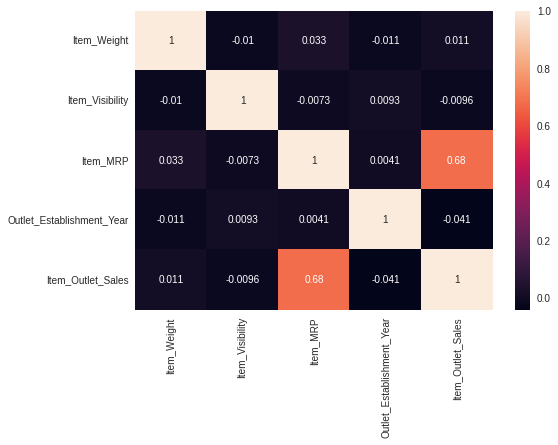

In [ ]:
# lets find which value have the best correlation with the columns where we have the NA values
# can't find a the correlation between ordinal values
corr_map = clean_df.corr()
sn.heatmap(corr_map, annot=True); 

We can see that the `Item_Weight` is not really that stongly correlated with any other column. 

In [ ]:
# correlation of the Items_weights
corr_map['Item_Weight'][1:].values 

array([-0.01022873,  0.03333044, -0.01059587,  0.01097183])

Let see if there is any correlation bewteen the ordinal value of `Outlet_size` and the other values 

Let see if we can graph the value other values vesus the `Outlet_Size`

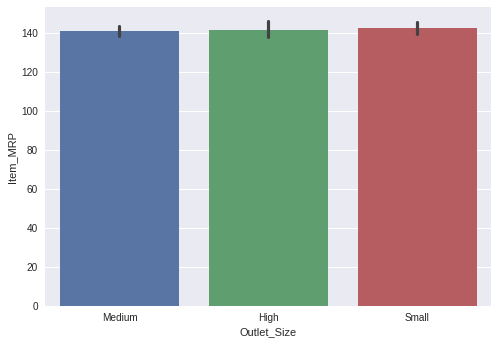

In [ ]:
# so let's plot it!
#clean_df[['Item_Outlet_Sales', 'Outlet_Size']].plot.bar(x='Outlet_Size', y='Item_Outlet_Sales');
#sn.boxplot(y='Item_Outlet_Sales', x='Outlet_Size', data=clean_df);
sn.barplot(y='Item_MRP', x='Outlet_Size',  data=clean_df);
#sn.barplot(y='Item_Outlet_Sales', x='Outlet_Size', data=clean_df);
sn.
#sn.barplot(y='Item_MRP', x='Outlet_Size', data=clean_df);


#clean_df.Outlet_Size.unique()


In [ ]:
# heck the number of na values
na_columns = super_cool_df.isna().any() # check which colmun have a na value
#g = sn.FacetGrid(data=super_cool_df, col='Outlet_Size', col_wrap=4)

#super_cool_df.loc[:, na_columns]

#add plots to grid
#g.map(sn.scatterplot, 'Outlet_Size', 'Item_Weight')


In [ ]:
# fill in the Na values
super_cool_df.fillna(method='ffill').isna().any()